In [3]:
!ls ../data


 audi.csv     focus.csv    merc.csv    'unclean cclass.csv'   vw.csv
 bmw.csv      ford.csv	   skoda.csv   'unclean focus.csv'
 cclass.csv   hyundi.csv   toyota.csv   vauxhall.csv


# Dataset Exploration

In [4]:
import pandas as pd
import os

# Define the path to the data directory
data_dir = '../data/original/'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define a function to standardize column names
def standardize_columns(df):
    df.columns = [col.lower().replace(' ', '_').replace('£', '') for col in df.columns]
    return df

# Define a function to extract make from filename
def extract_make(filename):
    return filename.split('.')[0]  # Assuming filename format is make.csv

# Load, standardize, and inspect each dataset
dataframes = {}
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    df = standardize_columns(df)
    df['make'] = extract_make(file)
    dataframes[file] = df
    print(f"--- {file} ---")
    print(df.head())
    print("\n")


--- ford.csv ---
     model  year  price transmission  mileage fueltype  tax   mpg  enginesize  \
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0   
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0   
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0   
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5   
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0   

   make  
0  ford  
1  ford  
2  ford  
3  ford  
4  ford  


--- vauxhall.csv ---
    model  year  price transmission  mileage fueltype  tax   mpg  enginesize  \
0   Corsa  2018   7885       Manual     9876   Petrol  145  55.4         1.4   
1   Corsa  2019  11995       Manual     2500   Petrol  145  54.3         1.4   
2   Corsa  2017   9777    Automatic     9625   Petrol  145  47.9         1.4   
3   Corsa  2016   8500       Manual    25796   Petrol   30  55.4         1.4   
4   Corsa  20

In [5]:
# Display basic info and stats
for file, df in dataframes.items():
    print(f"--- {file} ---")
    print(df.info())
    print(df.describe())
    print("\n")


--- ford.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fueltype      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   enginesize    17965 non-null  float64
 9   make          17965 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.4+ MB
None
               year         price        mileage           tax           mpg  \
count  17965.000000  17965.000000   17965.000000  17965.000000  17965.000000   
mean    2016.866574  12279.756415   23363.630504    113.334539     57.906991   
std        2.050346   4741.382606   19472.114690   

In [7]:

# Define a function to clean data
def clean_data(df):
    # Drop rows with missing values
    df = df.dropna()

    # Convert year and price to numeric
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['price'] = df['price'].replace('[£,]', '', regex=True).astype(float)

    # Convert tax to numeric if exists
    if 'tax' in df.columns:
        df['tax'] = df['tax'].replace('[£,]', '', regex=True).astype(float)
    if 'tax_' in df.columns:
        df['tax_'] = df['tax_'].replace('[£,]', '', regex=True).astype(float)

    return df

# Clean each dataset and ensure 'make' is the first column
for file, df in dataframes.items():
    df = clean_data(df)
    columns = ['make'] + [col for col in df.columns if col != 'make']
    df = df[columns]
    dataframes[file] = df
    print(f"--- {file} ---")
    print(df.head(2))
    print("\n")

# Combine datasets
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Save the combined dataset
combined_df.to_csv('../data/combined_car_data.csv', index=False)
print("Combined dataset saved to 'combined_car_data.csv'.")


--- ford.csv ---
   make    model  year    price transmission  mileage fueltype    tax   mpg  \
0  ford   Fiesta  2017  12000.0    Automatic    15944   Petrol  150.0  57.7   
1  ford    Focus  2018  14000.0       Manual     9083   Petrol  150.0  57.7   

   enginesize  
0         1.0  
1         1.0  


--- vauxhall.csv ---
       make   model  year    price transmission  mileage fueltype    tax  \
0  vauxhall   Corsa  2018   7885.0       Manual     9876   Petrol  145.0   
1  vauxhall   Corsa  2019  11995.0       Manual     2500   Petrol  145.0   

    mpg  enginesize  
0  55.4         1.4  
1  54.3         1.4  


--- vw.csv ---
  make   model  year    price transmission  mileage fueltype    tax   mpg  \
0   vw   T-Roc  2019  25000.0    Automatic    13904   Diesel  145.0  49.6   
1   vw   T-Roc  2019  26883.0    Automatic     4562   Diesel  145.0  49.6   

   enginesize  
0         2.0  
1         2.0  


--- skoda.csv ---
    make     model  year    price transmission  mileage fuelty

# Steps for Cleaning and Combining the Data
Standardize column names: Ensure all datasets have consistent column names.
Handle missing values: Decide on a strategy for missing values (e.g., imputation, removal).
Convert data types: Ensure columns are in the correct data type (e.g., year and price should be numeric).
Combine the datasets: Merge all individual datasets into a single DataFrame.
Save the combined dataset: Save the cleaned and combined dataset for further processing.

In [5]:
import pandas as pd
import os

# Define the path to the data directory
data_dir = '../data'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define a function to standardize column names
def standardize_columns(df):
    df.columns = [col.lower().replace(' ', '_').replace('£', '') for col in df.columns]
    return df

# Load, standardize, and inspect each dataset
dataframes = {}
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    df = standardize_columns(df)
    dataframes[file] = df
    print(f"--- {file} ---")
    print(df.head())
    print("\n")

# Display basic info and stats
for file, df in dataframes.items():
    print(f"--- {file} ---")
    print(df.info())
    print(df.describe())
    print("\n")


--- ford.csv ---
     model  year  price transmission  mileage fueltype  tax   mpg  enginesize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0


--- vauxhall.csv ---
    model  year  price transmission  mileage fueltype  tax   mpg  enginesize
0   Corsa  2018   7885       Manual     9876   Petrol  145  55.4         1.4
1   Corsa  2019  11995       Manual     2500   Petrol  145  54.3         1.4
2   Corsa  2017   9777    Automatic     9625   Petrol  145  47.9         1.4
3   Corsa  2016   8500       Manual    25796   Petrol   30  55.4         1.4
4   Corsa  2019  10000       Manual     3887   Petrol  145  43.5         1.4


--- vw.csv ---
    model  ye

In [6]:
# Define a function to clean data
def clean_data(df):
    # Drop rows with missing values
    df = df.dropna()

    # Convert year and price to numeric
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['price'] = df['price'].replace('[£,]', '', regex=True).astype(float)

    # Convert tax to numeric if exists
    if 'tax' in df.columns:
        df['tax'] = df['tax'].replace('[£,]', '', regex=True).astype(float)
    if 'tax_' in df.columns:
        df['tax_'] = df['tax_'].replace('[£,]', '', regex=True).astype(float)

    return df

# Clean each dataset
for file, df in dataframes.items():
    dataframes[file] = clean_data(df)
    print(f"--- {file} ---")
    print(df.head())
    print("\n")

# Combine datasets
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Save the combined dataset
combined_df.to_csv('../data/combined_car_data.csv', index=False)
print("Combined dataset saved to 'combined_car_data.csv'.")


--- ford.csv ---
     model  year  price transmission  mileage fueltype  tax   mpg  enginesize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0


--- vauxhall.csv ---
    model  year  price transmission  mileage fueltype  tax   mpg  enginesize
0   Corsa  2018   7885       Manual     9876   Petrol  145  55.4         1.4
1   Corsa  2019  11995       Manual     2500   Petrol  145  54.3         1.4
2   Corsa  2017   9777    Automatic     9625   Petrol  145  47.9         1.4
3   Corsa  2016   8500       Manual    25796   Petrol   30  55.4         1.4
4   Corsa  2019  10000       Manual     3887   Petrol  145  43.5         1.4


--- vw.csv ---
    model  ye

/tmp/ipykernel_4322/2090609296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'], errors='coerce')
/tmp/ipykernel_4322/2090609296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace('[£,]', '', regex=True).astype(float)
/tmp/ipykernel_4322/2090609296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Combined dataset saved to 'combined_car_data.csv'.


In [10]:
combined_df.info()
combined_df.describe()
combined_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111055 entries, 0 to 111054
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   make          111055 non-null  object 
 1   model         111055 non-null  object 
 2   year          111055 non-null  float64
 3   price         111055 non-null  float64
 4   transmission  111055 non-null  object 
 5   mileage       111055 non-null  object 
 6   fueltype      108540 non-null  object 
 7   tax           94327 non-null   float64
 8   mpg           99187 non-null   float64
 9   enginesize    108540 non-null  float64
 10  tax()         4860 non-null    float64
 11  fuel_type     2515 non-null    object 
 12  engine_size   2515 non-null    object 
 13  mileage2      2515 non-null    object 
 14  fuel_type2    2515 non-null    object 
 15  engine_size2  2515 non-null    object 
 16  reference     2515 non-null    object 
dtypes: float64(6), object(11)
memory usage: 14.4+ MB

,make,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,tax(),fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,ford,Fiesta,2017.0,12000.0,Automatic,15944,Petrol,150.0,57.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ford,Focus,2018.0,14000.0,Manual,9083,Petrol,150.0,57.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ford,Focus,2017.0,13000.0,Manual,12456,Petrol,150.0,57.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ford,Fiesta,2019.0,17500.0,Manual,10460,Petrol,145.0,40.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ford,Fiesta,2019.0,16500.0,Automatic,1482,Petrol,145.0,48.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111050,bmw,X3,2016.0,19000.0,Automatic,40818,Diesel,150.0,54.3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111051,bmw,5 Series,2016.0,14600.0,Automatic,42947,Diesel,125.0,60.1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111052,bmw,3 Series,2017.0,13100.0,Manual,25468,Petrol,200.0,42.8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111053,bmw,1 Series,2014.0,9930.0,Automatic,45000,Diesel,30.0,64.2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
combined_df.isnull().sum()

make                 0
model                0
year                 0
price                0
transmission         0
mileage              0
fueltype          2515
tax              16728
mpg              11868
enginesize        2515
tax()           106195
fuel_type       108540
engine_size     108540
mileage2        108540
fuel_type2      108540
engine_size2    108540
reference       108540
dtype: int64

In [20]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_df.isnull().sum() / len(combined_df) * 100

# Display the missing percentage for each column
print(missing_percentage)


make            0.0
model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fueltype        0.0
tax             0.0
mpg             0.0
enginesize      0.0
dtype: float64


# Clean Up Redundant Columns:

In [13]:
columns_to_drop = ['tax()', 'fuel_type', 'engine_size', 'mileage2', 'fuel_type2', 'engine_size2', 'reference']
combined_df = combined_df.drop(columns=columns_to_drop)


In [18]:
combined_df.make.value_counts()

make
ford              17965
vw                15157
vauxhall          13632
merc              13119
bmw               10781
audi              10668
toyota             6738
skoda              6267
focus              5454
hyundi             4860
cclass             3899
unclean focus      1307
unclean cclass     1208
Name: count, dtype: int64

In [19]:
# Create a mapping dictionary to combine unclean categories
make_mapping = {
    'unclean focus': 'focus',
    'unclean cclass': 'cclass'
}

# Apply the mapping to the 'make' column
combined_df['make'] = combined_df['make'].replace(make_mapping)

# Check the value counts again to confirm the changes
make_counts = combined_df['make'].value_counts()
print(make_counts)


make
ford        17965
vw          15157
vauxhall    13632
merc        13119
bmw         10781
audi        10668
focus        6761
toyota       6738
skoda        6267
cclass       5107
hyundi       4860
Name: count, dtype: int64


# Convert mileage to Numeric:

In [14]:
combined_df['mileage'] = combined_df['mileage'].replace('[\D]', '', regex=True).astype(float)


# Handle Missing Values:

In [15]:
combined_df['fueltype'] = combined_df['fueltype'].fillna(combined_df['fueltype'].mode()[0])
combined_df['enginesize'] = combined_df['enginesize'].fillna(combined_df['enginesize'].median())
combined_df['tax'] = combined_df['tax'].fillna(combined_df['tax'].median())
combined_df['mpg'] = combined_df['mpg'].fillna(combined_df['mpg'].median())


# Feature Engineering:

In [21]:
combined_df = pd.get_dummies(combined_df, columns=['make', 'transmission', 'fueltype'], drop_first=True)


# Verify Data Consistency:

In [22]:
print(combined_df['year'].unique())  # Verify year values
print(combined_df['price'].describe())  # Check price distribution


[2017. 2018. 2019. 2015. 2014. 2016. 2013. 2020. 2012. 2008. 2010. 2009.
 2011. 1998. 2007. 2005. 2006. 2002. 2003. 1996. 2004. 2000. 2060. 2001.
 1997. 1970. 1999. 1991. 1995.]
count    111055.000000
mean      16813.090955
std        9696.402303
min         450.000000
25%       10199.000000
50%       14600.000000
75%       20750.000000
max      159999.000000
Name: price, dtype: float64


# Handle Unusual Year Values:

In [23]:
combined_df = combined_df[combined_df['year'].between(1980, 2024)]  # Adjust the range as necessary


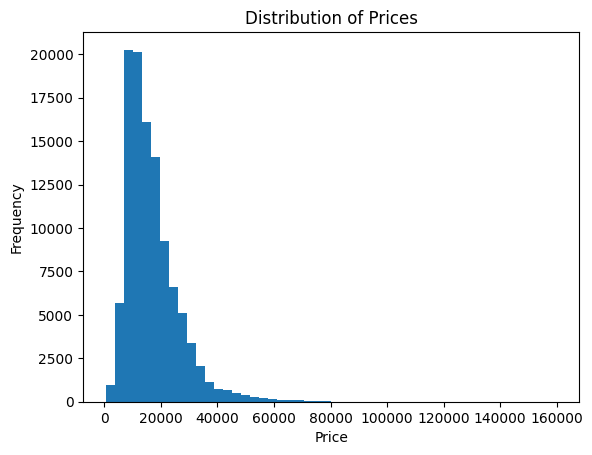

In [43]:
import matplotlib.pyplot as plt

# Example: Distribution of prices
plt.hist(combined_df['price'], bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Handle Outliers in Price:

In [24]:
import numpy as np

# Using the IQR method
Q1 = combined_df['price'].quantile(0.25)
Q3 = combined_df['price'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = combined_df[(combined_df['price'] >= (Q1 - 1.5 * IQR)) & (combined_df['price'] <= (Q3 + 1.5 * IQR))]

# Alternatively, use z-score
from scipy import stats
z_scores = np.abs(stats.zscore(combined_df['price'].dropna()))
filtered_df = combined_df[(z_scores < 3)]


# Re-run Descriptive Statistics:

In [25]:
print(filtered_df.describe())


                year          price        mileage            tax  \
count  109114.000000  109114.000000  109114.000000  109114.000000   
mean     2017.025863   16094.786838   23664.162591     123.457393   
std         2.137294    7905.860959   21404.118437      59.118154   
min      1991.000000     450.000000       1.000000       0.000000   
25%      2016.000000   10000.000000    8000.000000     125.000000   
50%      2017.000000   14495.000000   18000.000000     145.000000   
75%      2019.000000   20105.750000   33000.000000     145.000000   
max      2020.000000   45900.000000  323000.000000     580.000000   

                 mpg     enginesize  
count  109114.000000  109114.000000  
mean       55.412337       1.633576  
std        15.045072       0.508548  
min         0.300000       0.000000  
25%        47.900000       1.200000  
50%        54.300000       1.600000  
75%        61.400000       2.000000  
max       470.800000       6.300000  



Updated Summary
Your cleaned dataset now has:

Year: Ranges from 1991 to 2020, which is expected.
Price: Ranges from £450 to £45,900, with a mean of approximately £16,095.
Mileage: Ranges from 1 to 323,000, which seems reasonable but may still include outliers.
Tax: Ranges from £0 to £580, which aligns with typical values.
MPG: The maximum value is quite high, suggesting that there might be some data entry errors.
Engine Size: Ranges from 0.0 to 6.3, which seems reasonable.

# Verify Extreme Values in Mileage and MPG:

In [26]:
# Check extreme values in mileage
print(combined_df['mileage'].describe())

# Check extreme values in mpg
print(combined_df['mpg'].describe())


count    111052.000000
mean      23357.425143
std       21361.552439
min           1.000000
25%        7680.000000
50%       17606.000000
75%       32712.250000
max      323000.000000
Name: mileage, dtype: float64
count    111052.000000
mean         55.074561
std          15.254215
min           0.300000
25%          47.900000
50%          54.300000
75%          61.400000
max         470.800000
Name: mpg, dtype: float64


# Handle Extreme Values in Mileage and MPG:

In [27]:
# Cap extreme values for mileage
combined_df = combined_df[combined_df['mileage'].astype(float) <= 200000]

# Cap extreme values for mpg
combined_df = combined_df[combined_df['mpg'] <= 100]


# Re-evaluate Data Consistency:

In [28]:
# Check for duplicates
print(combined_df.duplicated().sum())

2478


In [29]:
# Display duplicate rows
duplicates = combined_df[combined_df.duplicated(keep='first')]
print(duplicates.head())


                      model    year    price  mileage    tax   mpg  \
159                   Focus  2016.0  10995.0  30923.0    0.0  74.3   
312                   Focus  2019.0  14998.0   7000.0  145.0  58.9   
349                   Focus  2019.0  14998.0   7000.0  145.0  58.9   
510                EcoSport  2019.0  15489.0   5636.0  145.0  68.9   
512   Grand Tourneo Connect  2019.0  19999.0   3500.0  145.0  61.4   

     enginesize  make_bmw  make_cclass  make_focus  ...  make_toyota  \
159         1.5     False        False       False  ...        False   
312         1.0     False        False       False  ...        False   
349         1.0     False        False       False  ...        False   
510         1.5     False        False       False  ...        False   
512         1.5     False        False       False  ...        False   

     make_vauxhall  make_vw  transmission_Manual  transmission_Other  \
159          False    False                 True               False   
31

In [30]:
combined_df = combined_df.drop_duplicates()


In [31]:
# Check for missing values
print(combined_df.isnull().sum())


model                     0
year                      0
price                     0
mileage                   0
tax                       0
mpg                       0
enginesize                0
make_bmw                  0
make_cclass               0
make_focus                0
make_ford                 0
make_hyundi               0
make_merc                 0
make_skoda                0
make_toyota               0
make_vauxhall             0
make_vw                   0
transmission_Manual       0
transmission_Other        0
transmission_Semi-Auto    0
fueltype_Electric         0
fueltype_Hybrid           0
fueltype_Other            0
fueltype_Petrol           0
dtype: int64


# Check Distribution of Categorical Columns:

In [35]:
# Check unique values in one-hot encoded columns
print(combined_df[['transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
				   'make_bmw',
'make_cclass',
'make_focus',
'make_ford',
'make_hyundi',
'make_merc',
'make_skoda',
'make_toyota',
'make_vauxhall',
'make_vw']].sum())
print(combined_df[['fueltype_Electric', 'fueltype_Hybrid', 'fueltype_Other', 'fueltype_Petrol']].sum())


transmission_Manual       61031
transmission_Other           10
transmission_Semi-Auto    24831
make_bmw                  10404
make_cclass                4959
make_focus                 5908
make_ford                 17805
make_hyundi                4763
make_merc                 12735
make_skoda                 6167
make_toyota                6669
make_vauxhall             13253
make_vw                   14797
dtype: int64
fueltype_Electric        2
fueltype_Hybrid       2703
fueltype_Other         201
fueltype_Petrol      60743
dtype: int64


In [59]:
print(combined_df['model'].unique())  # 'model' is a categorical feature


[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' ' Corsa'
 ' Astra' ' Viva' ' Mokka' ' Mokka X' ' Crossland X' ' Zafira' ' Meriva'
 ' Zafira Tourer' ' Adam' ' Grandland X' ' Antara' ' Insignia' ' GTC'
 ' Combo Life' ' Vivaro' ' Cascada' ' Kadjar' ' Agila' ' Tigra' ' Vectra'
 ' T-Roc' ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle' ' Caddy Maxi Life' ' Caravelle' ' Touareg'
 ' Arteon' ' Touran' ' Golf SV' ' Amarok' ' Tiguan Allspace' ' Shuttle'
 ' Jetta' ' CC' ' California' ' Caddy Life' ' Caddy' ' Caddy Maxi' ' Eos'
 ' Fox' ' Octavia' ' Citigo' ' Yeti Outdoor' ' Superb' ' Kodiaq' ' Rapid'
 ' Karoq' ' Fabia' ' Yeti' ' Scala' ' Roomster' ' Kamiq' ' GT86'
 ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius' ' Avensis'
 ' Verso

# Handle Low-Frequency Categories:

In [57]:
# Drop columns with low-frequency categories
combined_df_cleaned = combined_df.drop(columns=['transmission_Other', 'fueltype_Electric', 'fueltype_Other', 'model'])


In [60]:
# Save the cleaned DataFrame to a CSV file
combined_df_cleaned.to_csv('../data/cleaned_car_data.csv', index=False)


In [62]:
import pandas as pd

# Load the cleaned data
car_df = pd.read_csv('../data/cleaned_car_data.csv')

# Display basic info and statistics
print(car_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107991 entries, 0 to 107990
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    107991 non-null  float64
 1   price                   107991 non-null  float64
 2   mileage                 107991 non-null  float64
 3   tax                     107991 non-null  float64
 4   mpg                     107991 non-null  float64
 5   enginesize              107991 non-null  float64
 6   make_bmw                107991 non-null  bool   
 7   make_cclass             107991 non-null  bool   
 8   make_focus              107991 non-null  bool   
 9   make_ford               107991 non-null  bool   
 10  make_hyundi             107991 non-null  bool   
 11  make_merc               107991 non-null  bool   
 12  make_skoda              107991 non-null  bool   
 13  make_toyota             107991 non-null  bool   
 14  make_vauxhall       